# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# GitHub-Daten einlesen
base_url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/"
df_umsatz = pd.read_csv(base_url + "umsatzdaten_gekuerzt.csv")
df_wetter = pd.read_csv(base_url + "wetter.csv")
df_kiwo = pd.read_csv(base_url + "kiwo.csv")

df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])
df_wetter['Datum'] = pd.to_datetime(df_wetter['Datum'])
df_kiwo['Datum'] = pd.to_datetime(df_kiwo['Datum'])

# Mergen & Feature Engineering
df = df_umsatz.merge(df_wetter, on='Datum', how='left')
df = df.merge(df_kiwo, on='Datum', how='left')
df['KielerWoche'] = df['KielerWoche'].fillna(0).astype(int)
df['Wochentag'] = df['Datum'].dt.dayofweek
df['Monat'] = df['Datum'].dt.month
df['IstWochenende'] = df['Wochentag'].isin([5, 6]).astype(int)

# Überblick

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9334 non-null   int64         
 1   Datum                9334 non-null   datetime64[ns]
 2   Warengruppe          9334 non-null   int64         
 3   Umsatz               9334 non-null   float64       
 4   Bewoelkung           9264 non-null   float64       
 5   Temperatur           9318 non-null   float64       
 6   Windgeschwindigkeit  9318 non-null   float64       
 7   Wettercode           7009 non-null   float64       
 8   KielerWoche          9334 non-null   int64         
 9   Wochentag            9334 non-null   int32         
 10  Monat                9334 non-null   int32         
 11  IstWochenende        9334 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(4)
memory usage: 802.3 KB


# Statistiken

In [3]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,9334.0,1559311.249732,1307011.0,1410123.25,1601102.5,1704222.75,1807315.0,151250.254673
Datum,9334,2016-01-13 23:56:27.100921344,2013-07-01 00:00:00,2014-10-12 00:00:00,2016-01-10 00:00:00,2017-04-22 00:00:00,2018-07-31 00:00:00,NaN
Warengruppe,9334.0,3.088172,1.0,2.0,3.0,4.0,6.0,1.489002
Umsatz,9334.0,206.749044,7.051201,96.897441,161.900831,280.644663,1879.461831,144.545189
Bewoelkung,9264.0,4.720747,0.0,3.0,6.0,7.0,8.0,2.646273
Temperatur,9318.0,12.028483,-8.475,6.2375,11.625,17.9625,31.4375,7.232829
Windgeschwindigkeit,9318.0,10.97478,3.0,8.0,10.0,13.0,35.0,4.131974
Wettercode,7009.0,36.900128,0.0,10.0,28.0,61.0,95.0,27.095884
KielerWoche,9334.0,0.023891,0.0,0.0,0.0,0.0,1.0,0.152718
Wochentag,9334.0,3.000536,0.0,1.0,3.0,5.0,6.0,2.001044


# Visualisierung fehlender Werte

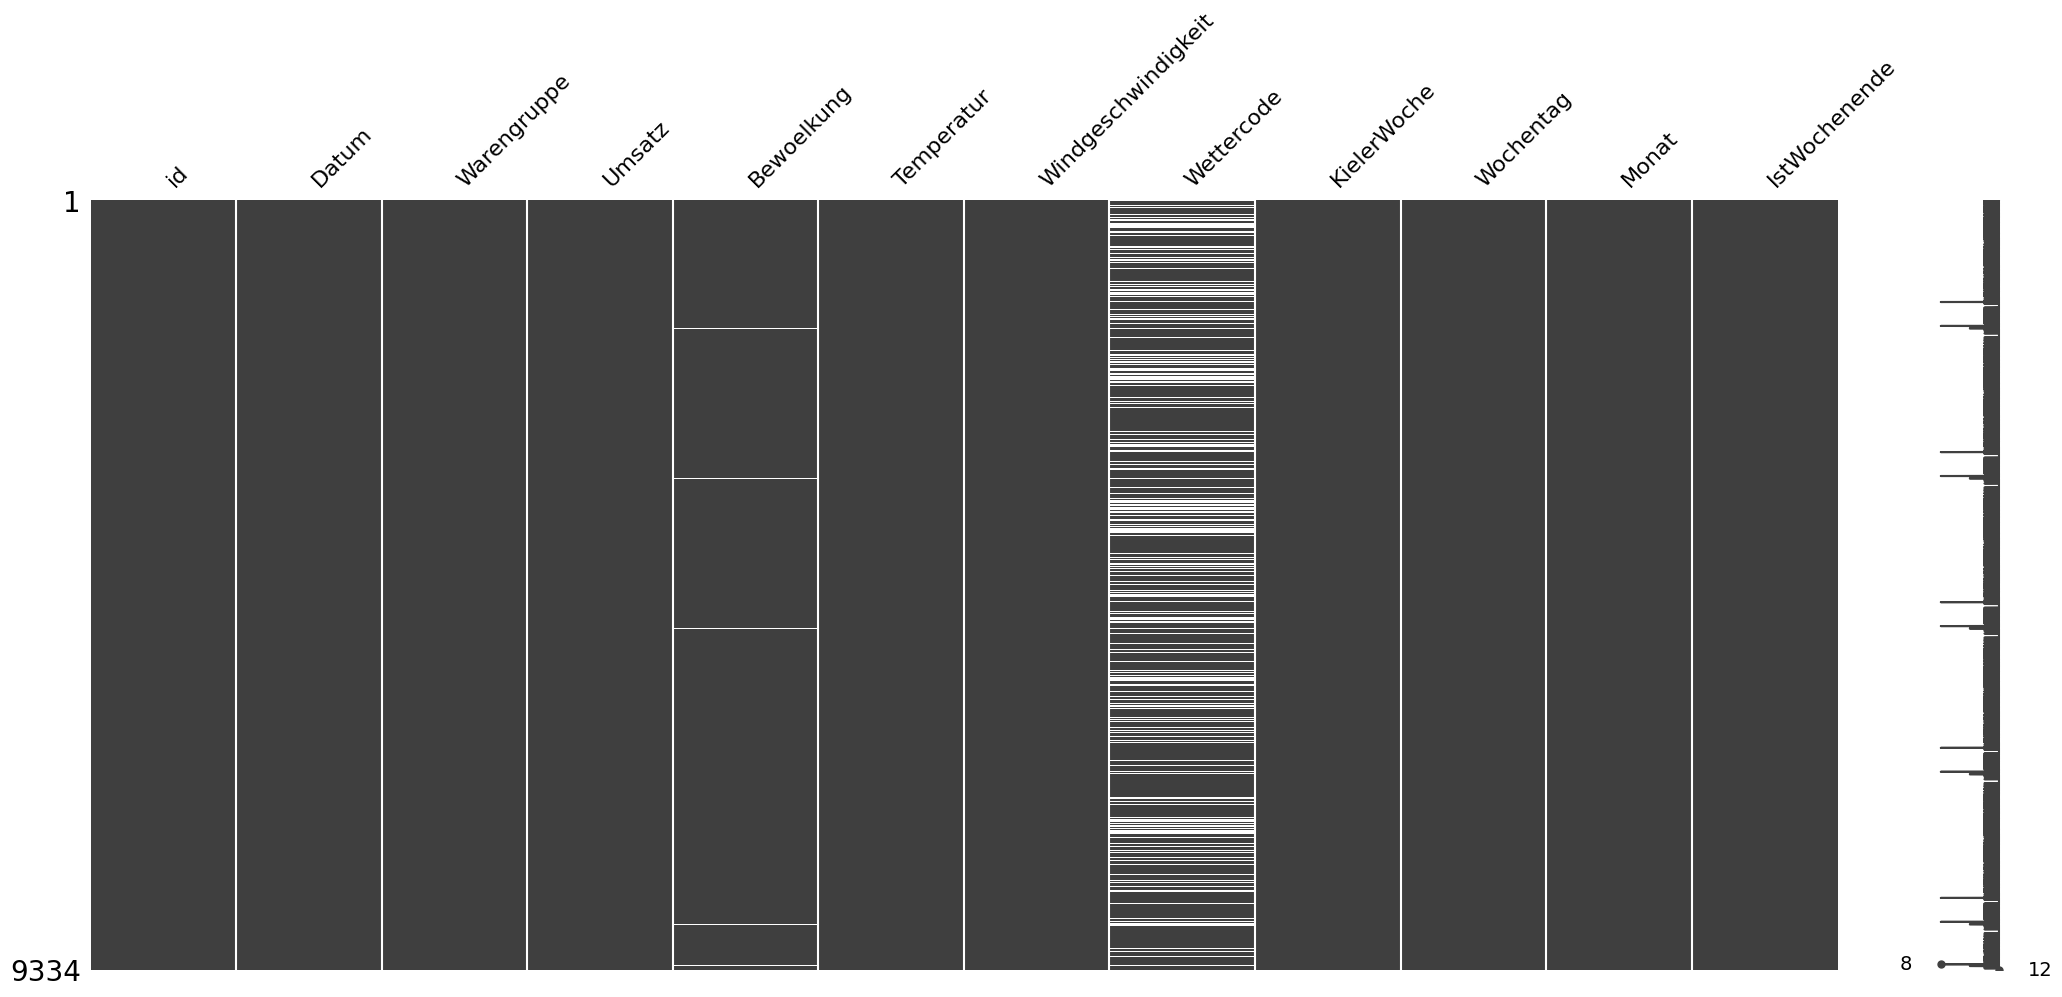

In [4]:
msno.matrix(df)
plt.show()

# Histogramm Umsatz

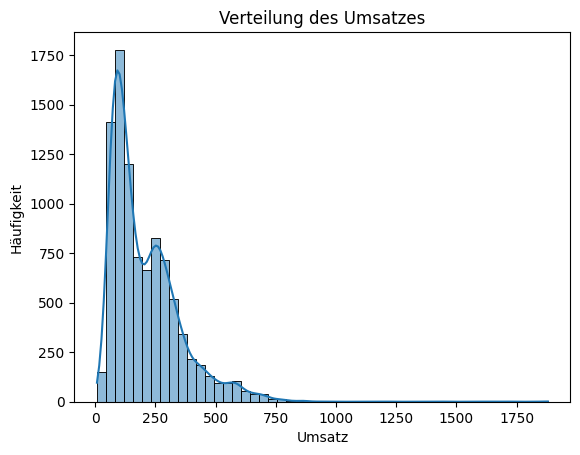

In [5]:
sns.histplot(df['Umsatz'], bins=50, kde=True)
plt.title("Verteilung des Umsatzes")
plt.xlabel("Umsatz")
plt.ylabel("Häufigkeit")
plt.show()